# KERAS MODEL FOR IMAGE CLASSIFICATION AND LANGUAGE DETECTION

### For *image classification*, a dataset collected from Kaggle, which contains images of Kannada alphabetsi sput to use. Additionally, a csv file that maps the labels to the images respectively is utilized for supervised training.

### For *language detection*, a pretrained BERT(Bidirectional Encoder Representations from Transformers) model to classify the text extracted from images.

In [99]:
#Import all the necessary libraries to build a model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D , Flatten , MaxPooling2D , Dense , Dropout
from sklearn.model_selection import train_test_split
import cv2
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data from the CSV file
data = pd.read_csv('kannada.csv')

#Convert the class labels into string datatype so that we  
data['class'] = data['class'].astype(str)

# Extract the image URLs(of image files) and labels(of each class) from the data
urls = data['img'].values
labels = data['class'].values

# split the data into training and testing sets using train_test_split from sklearn library
train_urls, test_urls, train_labels, test_labels = train_test_split(urls, labels, test_size=0.4, random_state=42)

In [3]:
#Visualize the shapes of the dataset after splitting into training and testing directories
train_urls.shape , test_urls.shape , train_labels.shape , test_labels.shape

((9855,), (6570,), (9855,), (6570,))

#### The *ImageDataGenerator* class of tensorflow Keras API allows generation of batches of images with real-time augmentation, mainly used to load and preprocess images for training deep neural networks

In [100]:
#Define an ImageDataGenerator instance

data_gen = ImageDataGenerator(rescale=1./255)

#### flow_from_dataframe is a method in the ImageDataGenerator that allows creation of a data generator for loading and augmenting images using a Pandas dataframe

In [101]:
# create data generators
train_data = data_gen.flow_from_dataframe(dataframe=pd.DataFrame({'img': train_urls, 'class': train_labels}),
                                              x_col='img', y_col='class',
                                              target_size=(28, 28),         #Resultant image size
                                              color_mode='grayscale',
                                              class_mode='sparse',
                                              batch_size=32)                #Batch size for training

val_data = data_gen.flow_from_dataframe(dataframe=pd.DataFrame({'img': test_urls, 'class': test_labels}),
                                             x_col='img', y_col='class',
                                             target_size=(28, 28),          #Resultant image size
                                             color_mode='grayscale',
                                             class_mode='sparse',
                                             batch_size=32)                 #Batch size for training

Found 9855 validated image filenames belonging to 657 classes.
Found 6570 validated image filenames belonging to 657 classes.


In [76]:
"""
Define the image preprocessing function that resizes the read image and 
converts it into gray_scale, followed by type casting it into float type 
then expanding the dimensions to match the model requirements.
"""
def preprocess_image(img):
    img = cv2.resize(img, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)
    return img

In [77]:
"""
Define the data generator function that generates batches of images
from the csv file and urls and stores them in a list with the 
respective labels and return them in the form of generator object.

"""
def data_generator(data, batch_size=32):
    while True:
        indices = np.random.randint(len(data), size=batch_size)
        batch_data = data.iloc[indices]
        batch_images = []
        batch_labels = []
        for i, row in batch_data.iterrows():
            img = np.array(row[1:]).reshape(28,28,1)
            label = row[0]
            img = preprocess_image(img)
            batch_images.append(img)
            batch_labels.append(label)
        yield np.array(batch_images), np.array(batch_labels)

In [6]:
#Define input_shape , batch_size and the number of output classes as some global values

input_shape = (28,28,1)
batch_size = 32
num_classes = 657

In [7]:
#Create a model using Sequential API of the tensorflow library
model_0 = tf.keras.Sequential()

model_0.add(Conv2D(32 ,kernel_size = (3,3) , activation = 'relu' , padding = 'same' , input_shape = input_shape))
model_0.add(MaxPooling2D(pool_size = 2))
model_0.add(Conv2D(64 , kernel_size = (3,3) , padding = 'same' , activation = 'relu'))
model_0.add(MaxPooling2D(pool_size = 2))

model_0.add(Flatten())

model_0.add(Dense(128 , activation = 'relu'))
model_0.add(Dropout(0.5))

model_0.add(Dense(num_classes , activation = 'softmax'))

In [8]:
#Define an Adam optimizer with learning rate of 0.001. Learning rate should not be too low or too high to avoid overfitting.
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_0.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])

In [10]:
#Fit the model with 40 epochs to achieve a commendable accuracy.
history_0 = model_0.fit(train_data,
                        validation_data = val_data,
                        epochs = 40,
                        verbose = 1)
                        # steps_per_epoch = int(0.1*len(train_data)),
                        # validation_steps = int(0.1*len(val_data)))

Epoch 1/30
308/308 [==============================] - 203s 660ms/step - loss: 3.3924 - accuracy: 0.2035 - val_loss: 3.1986 - val_accuracy: 0.2578
Epoch 2/30
308/308 [==============================] - 211s 685ms/step - loss: 3.1629 - accuracy: 0.2342 - val_loss: 3.0237 - val_accuracy: 0.2895
Epoch 3/30
308/308 [==============================] - 214s 695ms/step - loss: 3.0129 - accuracy: 0.2529 - val_loss: 2.9184 - val_accuracy: 0.2973
Epoch 4/30
308/308 [==============================] - 217s 704ms/step - loss: 2.8227 - accuracy: 0.2815 - val_loss: 2.7907 - val_accuracy: 0.3142
Epoch 5/30
308/308 [==============================] - 206s 670ms/step - loss: 2.6860 - accuracy: 0.3076 - val_loss: 2.6934 - val_accuracy: 0.3335
Epoch 6/30
308/308 [==============================] - 214s 697ms/step - loss: 2.5535 - accuracy: 0.3370 - val_loss: 2.6558 - val_accuracy: 0.3440
Epoch 7/30
308/308 [==============================] - 213s 691ms/step - loss: 2.4467 - accuracy: 0.3546 - val_loss: 2.6017 -

In [11]:
loss,accuracy = model_0.evaluate(val_data)

206/206 [==============================] - 79s 384ms/step - loss: 2.6434 - accuracy: 0.4204


In [36]:
print(f'Accuracy of the model is: {100*accuracy}')

Accuracy of the model is: 42.039573192596436


In [ ]:
classnames = np.arange(0,657)

In [37]:
"""
Define functions to plot loss and accuracy curves,
load image into the console and
make predictions and plot them with the predicted label.
"""


def loss_and_accuracy(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs , loss , label = 'training_loss')
    plt.plot(epochs , val_loss , label = 'validation_loss')
    plt.title('Loss Curve')
    plt.xlabel('epochs')
    plt.legend()
  
    plt.figure()

    plt.plot(epochs , accuracy , label = 'training_accuracy')
    plt.plot(epochs , val_accuracy , label = 'validation_accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('epochs')
    plt.legend()
    
    
def load_image(filename , img_shape=224):

    img = tf.io.read_file(filename)

    img = tf.image.decode_image(img , channels = 3)

    img = tf.image.resize(img , size = [img_shape , img_shape])

    img = img/255.

    return img


def make_predictions(model , filename , classnames):

    image = load_image(filename)

    pred = model.predict(tf.expand_dims(image , axis=0))

    pred_class = classnames[tf.argmax(tf.round(pred)[0])]

    plt.imshow(image)
    plt.title(f'Predicted class: {pred_class}')

    plt.axis(False)

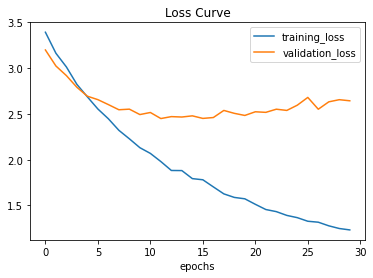

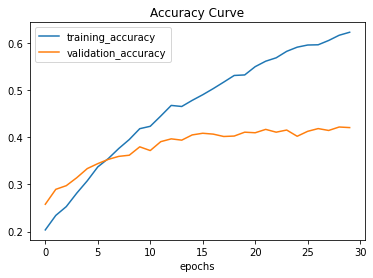

In [67]:
#Visualize the loss and accuracy curves of the model.

loss_and_accuracy(history_0)

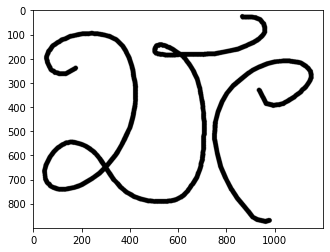

In [159]:
#For testing, we take a sample image from the dataset and make predictions.

img = cv2.imread('img/img044-001.png')
image = cv2.imread('img/img002-007.png')
plt.imshow(img , cmap = 'gray')

In [160]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)          # Convert to grayscale
image = cv2.resize(image, (28, 28))                      # Resize to 28x28
image = image.reshape(1, 28, 28, 1)                     # Reshape to (1, 28, 28, 1)
image = image / 255.0                                    # Normalize pixel values between 0 and 1

In [162]:
len(classnames)

657

In [163]:
prediction = model_0.predict(image)

1/1 [==============================] - 0s 125ms/step


In [164]:
pred_image = classnames[tf.argmax(tf.round(prediction)[0])]

In [165]:
print(pred_image)

111


### The following code is for language detection which is attained using a BERT pre-trained model.


**AutoModelForSequenceClassification** is used to classify sentences based on the language they belong to. It is a pre-trained model that uses a pre-trained tokenizer to make predictions.

In [150]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

#text = "ನಾನು ಇಂದು ಕಾಲೇಜಿಗೆ ಹೋಗುತ್ತಿಲ್ಲ"
text = "నేను ఈ రోజు కాలేజీకి వెళ్ళడం లేదు"
# Load the pre-trained tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=8)

# Encode the extracted text
encoded_text = tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    padding='max_length',
    max_length=128,
    return_attention_mask=True,
    return_tensors='pt'
)

# Classify the text using the model
outputs = model(**encoded_text)
predictions = outputs.logits.softmax(dim=1).detach().numpy()[0]

# Print the predicted labels and probabilities
labels = ["English", "Gujurati", "Kannada", "Hindi", "Bengali", "Marathi", "Tamil", "Telegu"]
for i in range(len(labels)):
    print(f"{labels[i]}: {predictions[i]}")
    

pred = np.argmin(predictions)

pred

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

English: 0.13927780091762543
Gujurati: 0.13146767020225525
Kannada: 0.1405726671218872
Hindi: 0.10965803265571594
Bengali: 0.12808352708816528
Marathi: 0.10694326460361481
Tamil: 0.13796767592430115
Telegu: 0.10602939873933792


7

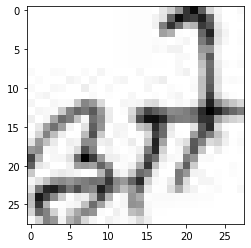

In [184]:
image = cv2.imread('C:\\Users\\anany\\Furious Four\\nhcd\\001_01.jpg')
plt.imshow(image)

In [185]:
model_0.save('model.h5')

In [187]:
!pip install tensorflowjs


ERROR: Cannot install flax because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts



     ---------------------------------------- 85.1/85.1 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 189.9/189.9 kB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 9.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
INFO: pip is looking at multiple versions of tensorflowjs to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 85.1/85.1 kB ? eta 0:00:00
     ---------------------------------------- 226.2/226.2 kB ? eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 85.1/85.

'tensorflowjs_converter' is not recognized as an internal or external command,
operable program or batch file.


'model.h5mnist-model'

In [190]:
tensorflowjs_converter --input_format keras 'model.h5' 'mnist-model'

SyntaxError: invalid syntax (2736337898.py, line 1)